# **Amazon sales data:**

## **Problem Statement:**

- Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits.
- Sales management today is the most important function in a commercial and business enterprise.

- Do ETL: Extract-Transform-Load some Amazon dataset
- And find Sales-trend -> month-wise, year-wise, yearly_month-wise
- Find key metrics and factors and show the meaningful relationships between attributes. 

In [1]:
# Handling Warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>## **Exploration of Data**

In [3]:
amazon = pd.read_csv('Amazon Sales data.csv')

In [4]:
amazon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
amazon.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [6]:
print('Number of Observations:',amazon.shape[0])
print('Number of Features:',amazon.shape[1])

Number of Observations: 100
Number of Features: 14


> **Insight:**
- Total Number of rows are 100
- Total Nmber of columns or Features are 14

In [7]:
amazon.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
# Basic information about the dataframe:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


## *Descriptive statistics:*

In [9]:
amazon.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [10]:
amazon.describe(include = 'object')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
count,100,100,100,100,100,100,100
unique,7,76,12,2,4,100,99
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,11/17/2010
freq,36,4,13,50,30,1,2


In [11]:
amazon.describe(include = 'all')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
unique,7,76,12,2,4,100,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,NaN,11/17/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.550204e+08,NaN,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1.146066e+08,NaN,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.389225e+08,NaN,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.577086e+08,NaN,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.907551e+08,NaN,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05


In [12]:
# It represents the data Types for each columns:
amazon.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

## **Checking for null values:**

In [13]:
amazon.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [64]:
df.duplicated().sum()

0

## **Visual Checks for missing data:**

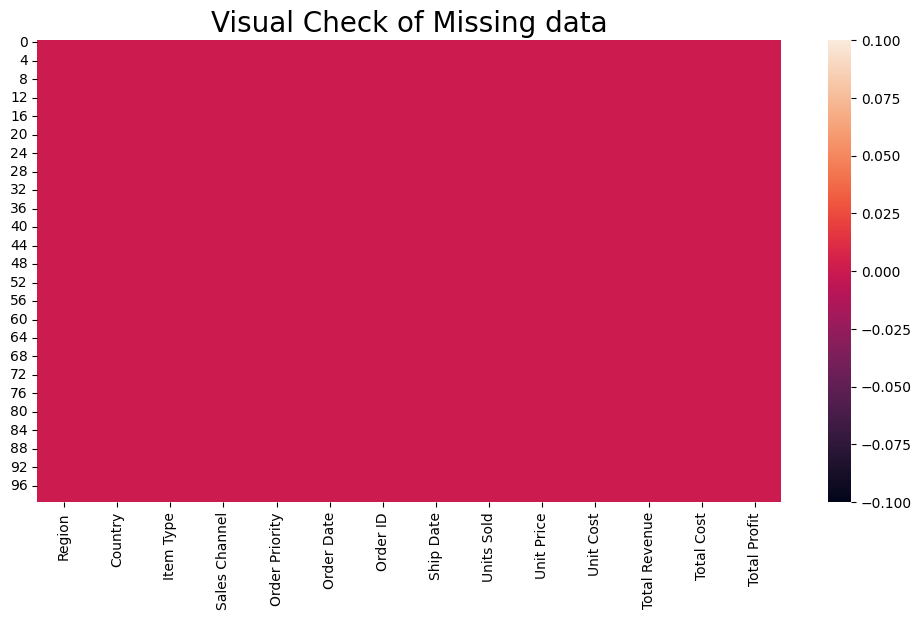

In [14]:
plt.figure(figsize=(12,6))
# Plot Heatmap:
sns.heatmap(amazon.isnull())
plt.title('Visual Check of Missing data',fontsize = 20)
plt.yticks(rotation = 0)
plt.show()

>**Insight:**
- There Were no Missing data Present inside each columns as we can also visually observed.
- And there were no Duplicated values present in the dataframe.

## **Creating copy for amazon data:**

In [15]:
df = amazon.copy()
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


## **Data Wrangling:**

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [17]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()/len(df)

Region            0.0
Country           0.0
Item Type         0.0
Sales Channel     0.0
Order Priority    0.0
Order Date        0.0
Order ID          0.0
Ship Date         0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
Total Revenue     0.0
Total Cost        0.0
Total Profit      0.0
dtype: float64

### **Feature Engineering:**

In [20]:
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

In [21]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Month                     object
Year                       int32
dtype: object

## **Unique value for each features:**

In [66]:
for col in df.columns:
    print(f'Unique Number of values in {col} column is {df[col].nunique()}.')

Unique Number of values in Region column is 7.
Unique Number of values in Country column is 76.
Unique Number of values in Item Type column is 12.
Unique Number of values in Sales Channel column is 2.
Unique Number of values in Order Priority column is 4.
Unique Number of values in Order Date column is 100.
Unique Number of values in Order ID column is 100.
Unique Number of values in Ship Date column is 99.
Unique Number of values in Units Sold column is 99.
Unique Number of values in Unit Price column is 12.
Unique Number of values in Unit Cost column is 12.
Unique Number of values in Total Revenue column is 100.
Unique Number of values in Total Cost column is 100.
Unique Number of values in Total Profit column is 100.
Unique Number of values in Month column is 12.
Unique Number of values in Year column is 8.
Unique Number of values in Unit Margin column is 12.
Unique Number of values in Total Sales column is 100.


# **Univariate analysis:**

### *Detecting outliers in our dataframe:*

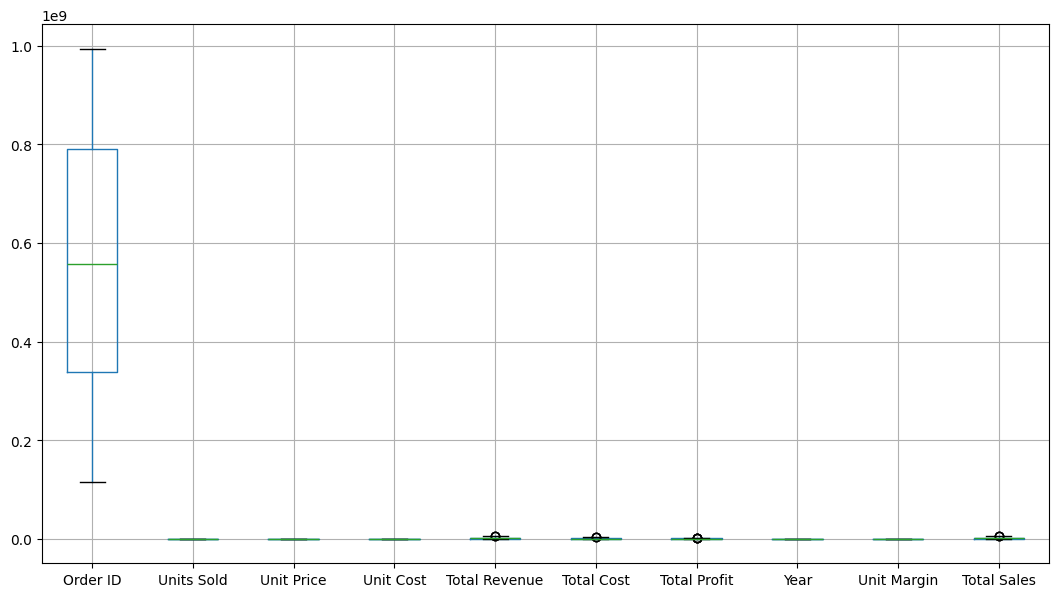

In [65]:
df.boxplot(figsize = (13, 7));

**Insight:**

- We are using boxplot for identifying the outliers.
- There is no Outliers presetn in our dataframe 

## **Distribution of our features:**

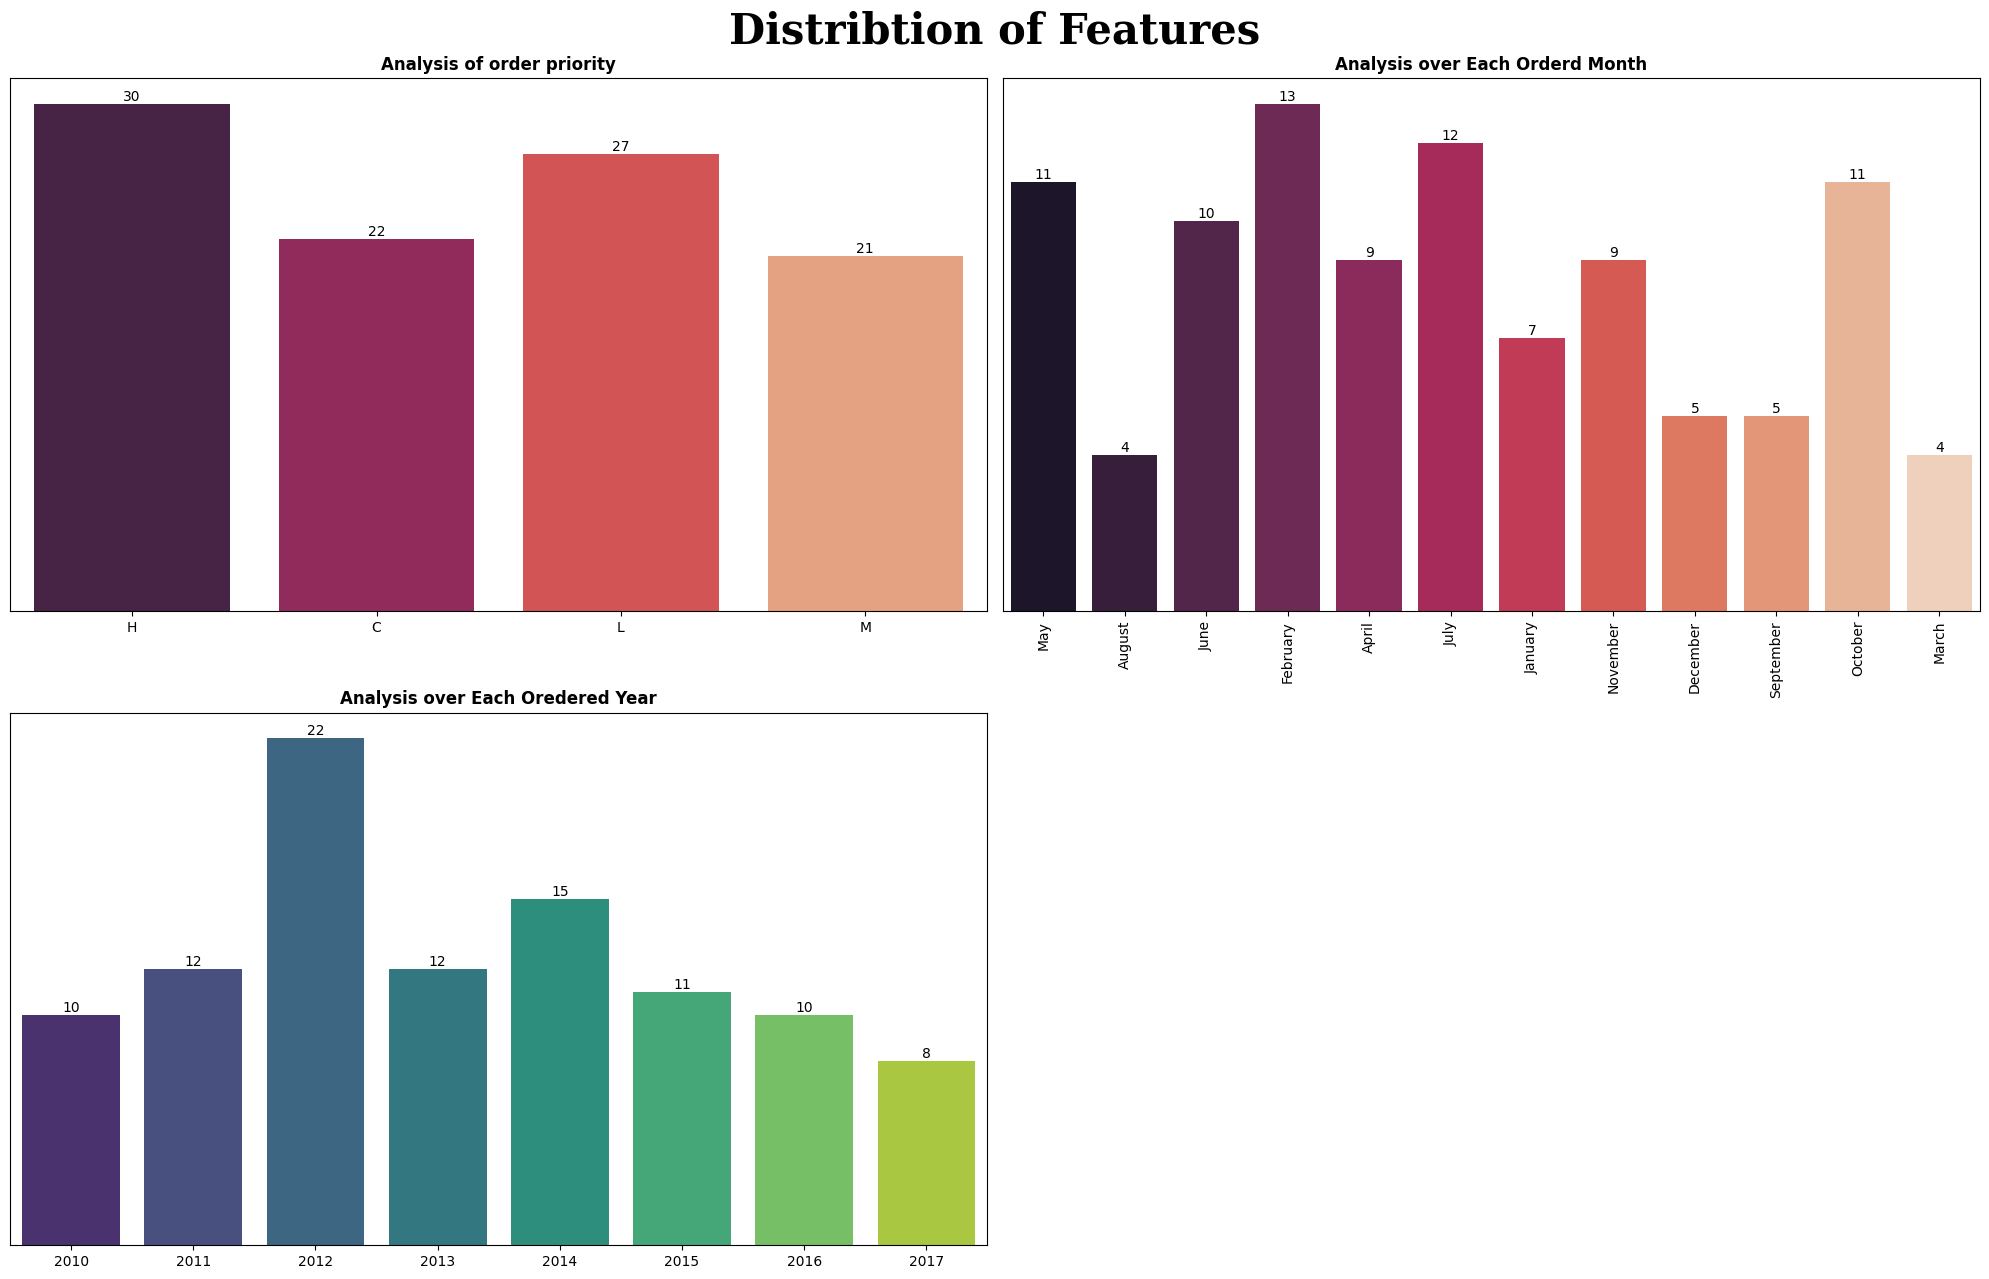

In [70]:
plt.figure(figsize=(20, 13))
plt.suptitle('Distribtion of Features' ,fontsize = 30, fontweight='bold',fontfamily='serif')

plt.subplot(221)
a = sns.countplot(data = df, x = 'Order Priority', palette='rocket')
plt.title('Analysis of order priority',fontsize = 12, fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.yticks([])
a.set(xlabel=None, ylabel=None)
    
plt.subplot(222)
b = sns.countplot(data = df, x = 'Month', palette='rocket')
plt.title('Analysis over Each Orderd Month',fontsize = 12, fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation = 90)
plt.yticks([])
b.set(xlabel=None, ylabel=None)

plt.subplot(223)
c = sns.countplot(data = df, x = 'Year', palette='viridis')
plt.title('Analysis over Each Oredered Year',fontsize = 12, fontweight='bold')
for i in c.containers:
    c.bar_label(i)
plt.yticks([])
c.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

**Insight:**

- We have ploted countplot.
- From the order Priority column, H is having highest count value of 30, followed by L having value 27.
- C and M are Having less values in comparison with Other order priority.
- After ploting the Month feature from the dataframe, we can observe that Feburary is the month with the highest Count of 13, followed by July(12), May & October(11), etc.
- After ploting the Year feature from the dataset we can observe that, in The year of 2012 highest Count of 22 took place, followed by 2014 with count of 15, 2011 and 2015 with 11 and so on.

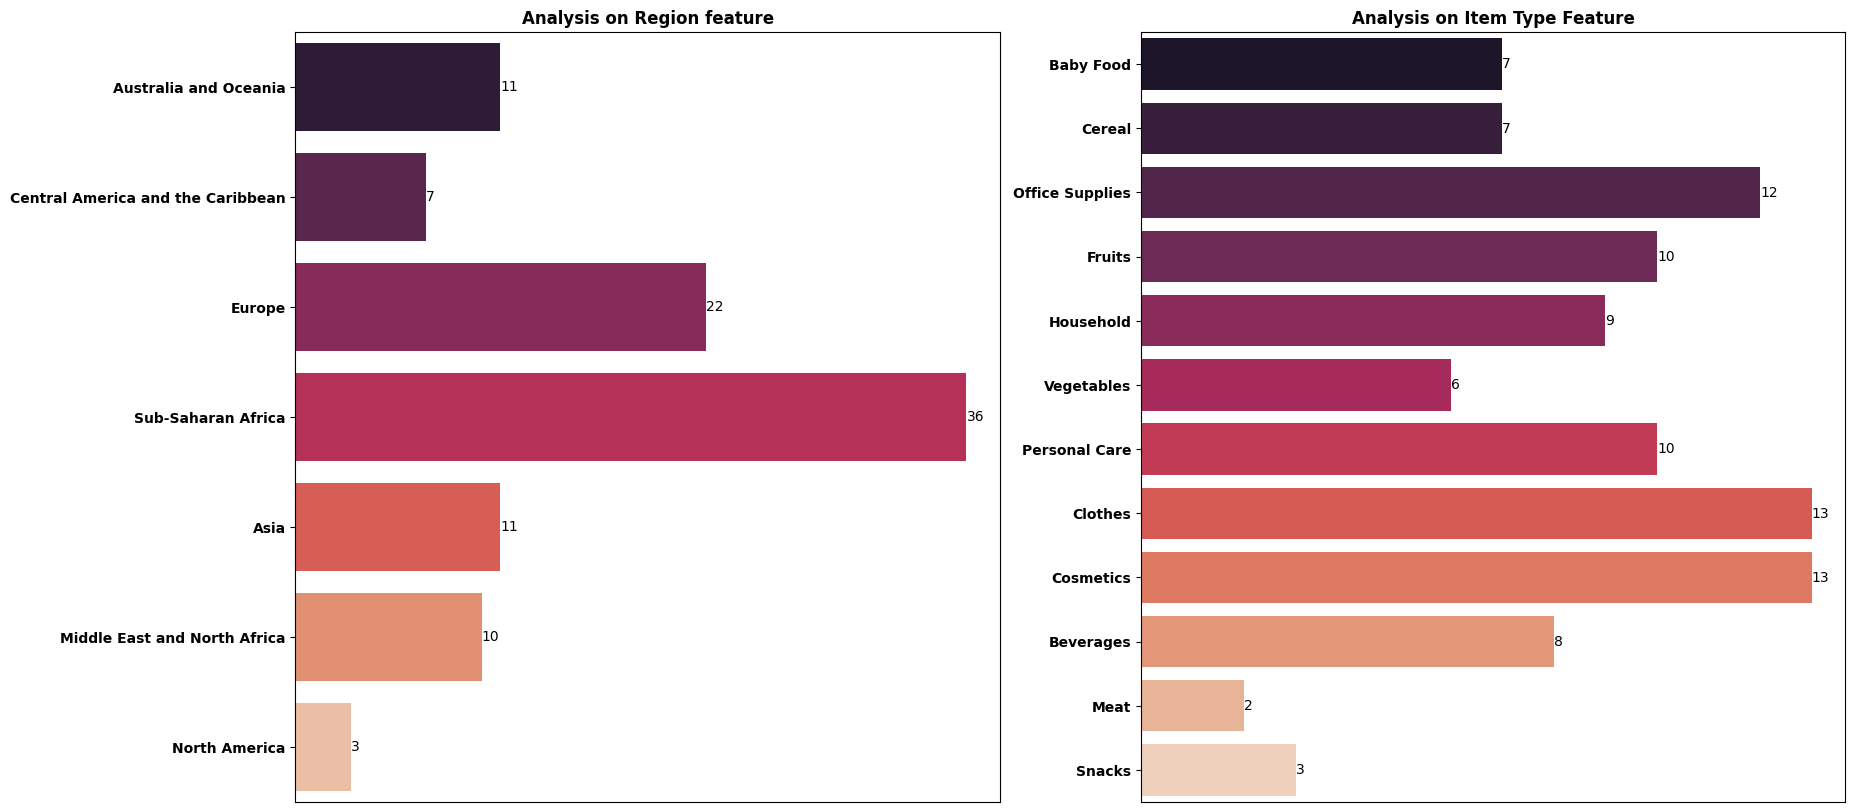

In [72]:
plt.figure(figsize = (20,10))

plt.subplot(121)
a = sns.countplot(data = df, y = 'Region', palette='rocket')
plt.title('Analysis on Region feature',fontsize = 12, fontweight='bold')
plt.yticks(fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.xticks([])
a.set(ylabel= None,xlabel=None)

plt.subplot(122)
b= sns.countplot(data = df, y = 'Item Type', palette='rocket')
plt.title('Analysis on Item Type Feature',fontsize = 12, fontweight='bold')
plt.yticks(fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.xticks([])
b.set(ylabel= None,xlabel=None);

>**Insight:**

- Analysis on Region Feature:
1. The left plot shows a count of data point using a horizontal bar chart.
2. The Sub-Sharan Africa region having the highest count of 36, is the most dominant region in the dataset.
3. 2nd and 3rd highest region are Europe and Asia respectively.

- Number of TV Shows Released Over Each Year:
1. The right plot displays the count of items type using a horizontal bar chart.
2.  Most common item type can be identified from the plot.
3. Clothes and Cosmetics are the most common or dominant item types.
4. Followed by the Office supplies ,fruits and personal care items. 

## **Heat Map:**

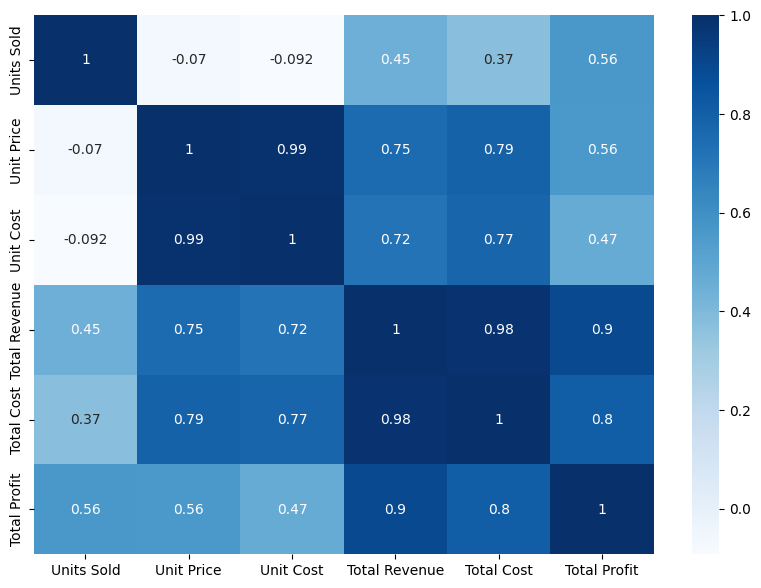

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Units Sold', 'Unit Price', 'Unit Cost','Total Revenue', 'Total Cost', 'Total Profit']].corr(), annot=True, cmap = 'Blues')
plt.show()

>**Insights:**

- HeatMap shows the correlation between our features.
- Firstly lets understand something; Unit Price is the amount of money charged per individual unit of a product or service,
- while Unit Cost refers to the expenses associated with producing each unit of that same product or service.

From the above plot:
- We can observe that Unit Price and Unit cost are highly positively correlated.

In [73]:
df['Unit Margin'] = df['Unit Price'] - df['Unit Cost']
df['Total Sales'] = df['Units Sold'] * df['Unit Price']

## **Key performace Indicators:**

In [84]:
# Calculate the Total units solds:
print('Total Units Solds:', round(df['Units Sold'].sum(),2))
print('Average Units solds', round(df['Units Sold'].mean(),2))
print('-'*25)
# Calculate the Total units cost:
print('Total Unit Cost:', round(df['Unit Cost'].sum(),2))
print('Average Units Costs', round(df['Unit Cost'].mean(),2))
print('-'*25)
# Calculate the Total Revenue:
print('Total Revenue:', round(df['Total Revenue'].sum(),2))
print('Average Total Revenue', round(df['Total Revenue'].mean(),2))
print('-'*25)
# Calculate the Total units solds:
print('Total Cost:', round(df['Total Cost'].sum(),2))
print('Average Total Cost:', round(df['Total Cost'].mean(),2))
print('-'*25)
# Calculate the Total Profit:
print('Total Profit:', round(df['Total Profit'].sum(),2))
print('Average Total Profit:', round(df['Total Profit'].mean(),2))

print('-'*25)
# Calculate the Total Sales:
print('Total Sales:', round(df['Total Sales'].sum(),2))
print('-'*25)
# Calculate Order count:
print('Orders count:', round(df['Order ID'].count(),2))

Total Units Solds: 512871
Average Units solds 5128.71
-------------------------
Total Unit Cost: 19104.8
Average Units Costs 191.05
-------------------------
Total Revenue: 137348768.31
Average Total Revenue 1373487.68
-------------------------
Total Cost: 93180569.91
Average Total Cost: 931805.7
-------------------------
Total Profit: 44168198.4
Average Total Profit: 441681.98
-------------------------
Total Sales: 137348768.31
-------------------------
Orders count: 100


## *Analyzing the item type feature:*

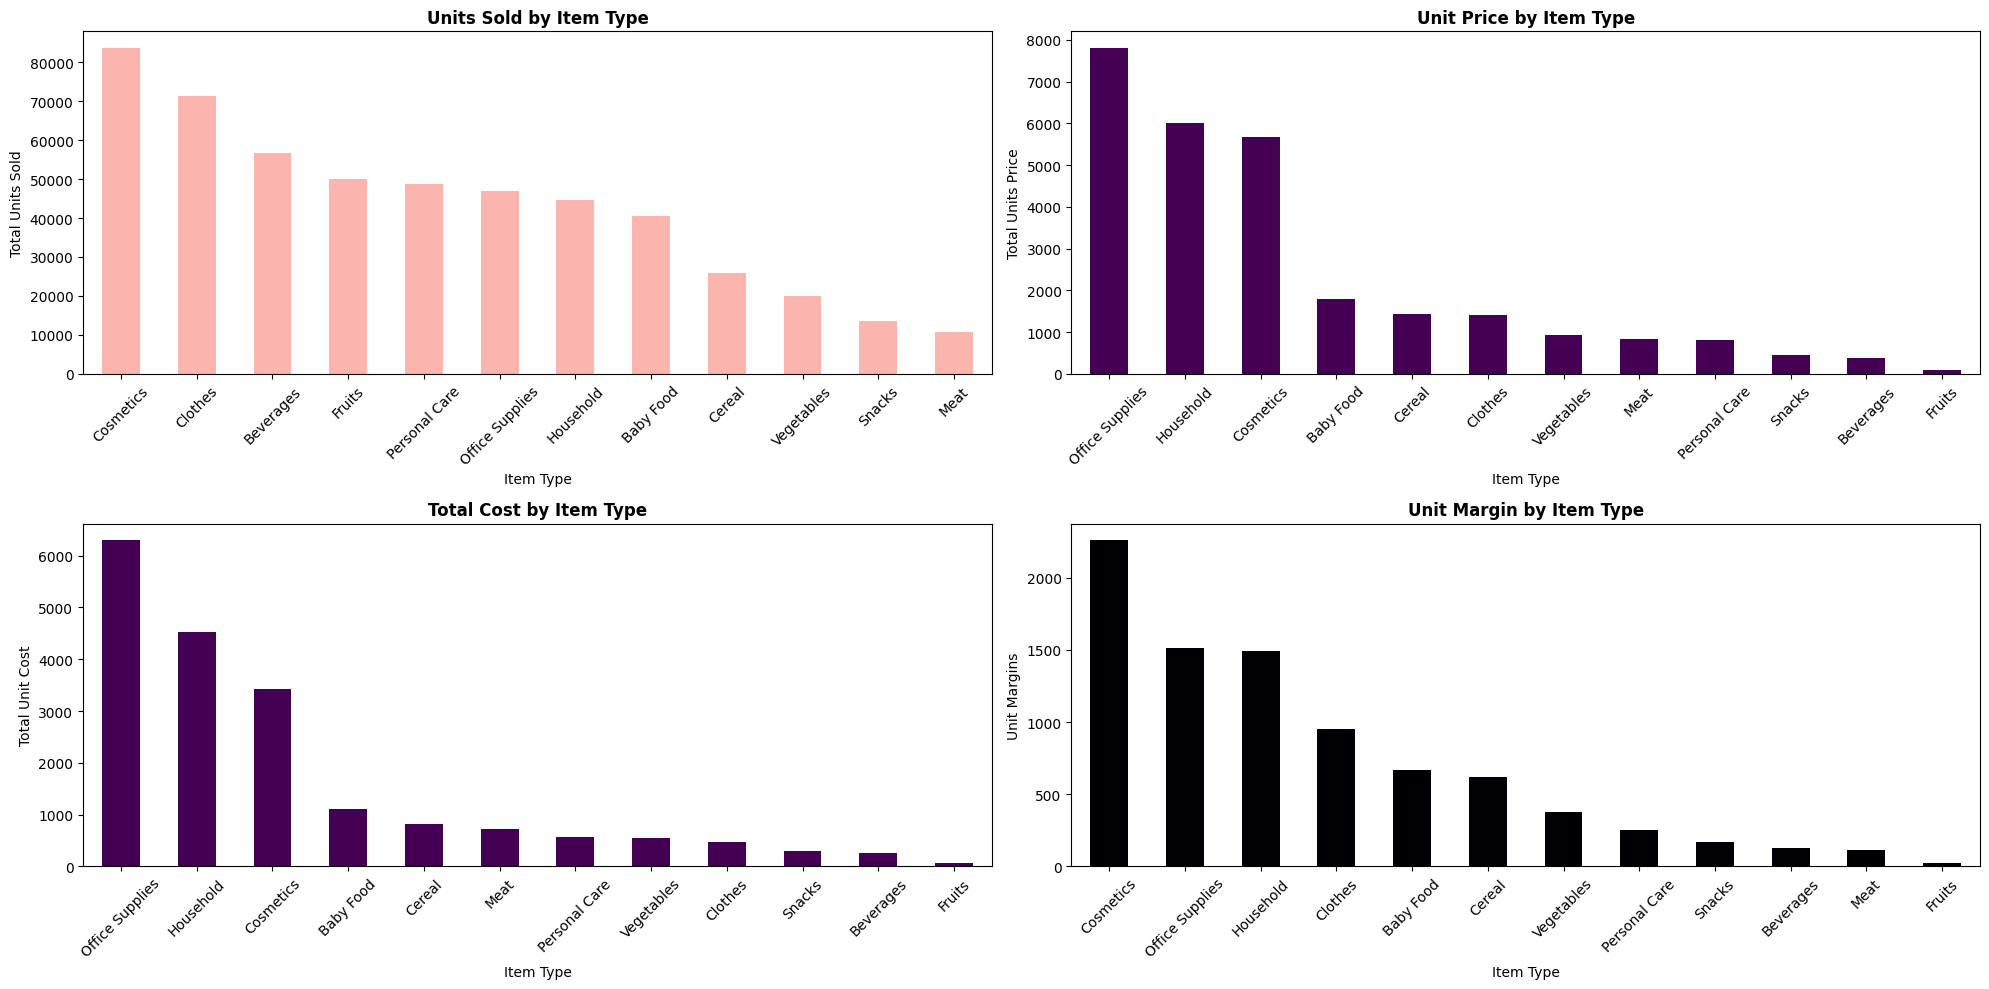

In [29]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', colormap='Pastel1')
plt.title('Units Sold by Item Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(222)
df.groupby('Item Type')['Unit Price'].sum().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Unit Price by Item Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Units Price')
plt.xticks(rotation=45)

plt.subplot(223)
df.groupby('Item Type')['Unit Cost'].sum().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Total Cost by Item Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Unit Cost')
plt.xticks(rotation=45)

plt.subplot(224)
df.groupby('Item Type')['Unit Margin'].sum().sort_values(ascending=False).plot(kind='bar', colormap='magma')
plt.title('Unit Margin by Item Type', fontsize=12, fontweight='bold')
plt.ylabel('Unit Margins')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insights:**

1. Units Sold by Item Type:
- The first subplot shows the total units sold for each item type.
- The bars represent the quantity of units sold.
- From the plot, We can identify that Cosmetics item types is having the highest sales volume.
- And snacks & meat are having the least sales value.
  
2. Unit Price by Item Type:
- The second subplot displays the total unit price (revenue) for each item type.
- It provides insights into the revenue generated by different products.
- From the plot, We can identify that Office supplies and household item types is having the highest price volume.
- And Fruits & Beverages genetates least price value.

3. Total Cost by Item Type:
- The third subplot illustrates the total cost (expenses) associated with each item type.
- It helps us understand which products are more costly to produce.
- From the plot, We can identify that Office supplies and household item types are most costly to produce.
- And Fruits & Beverages are least costly to produce.

4.  Unit Margin by Item Type:
- The fourth subplot represents the unit margin (profit margin) for each item type.
- Unit margin is calculated as the difference between unit price and unit cost.
- From the plot, We can identify that Cosmetics and household item types is having the highest profit margins.
- And Fruits & meat genetates with the least profit margin.

## *Analyzing the Order priority feature:*

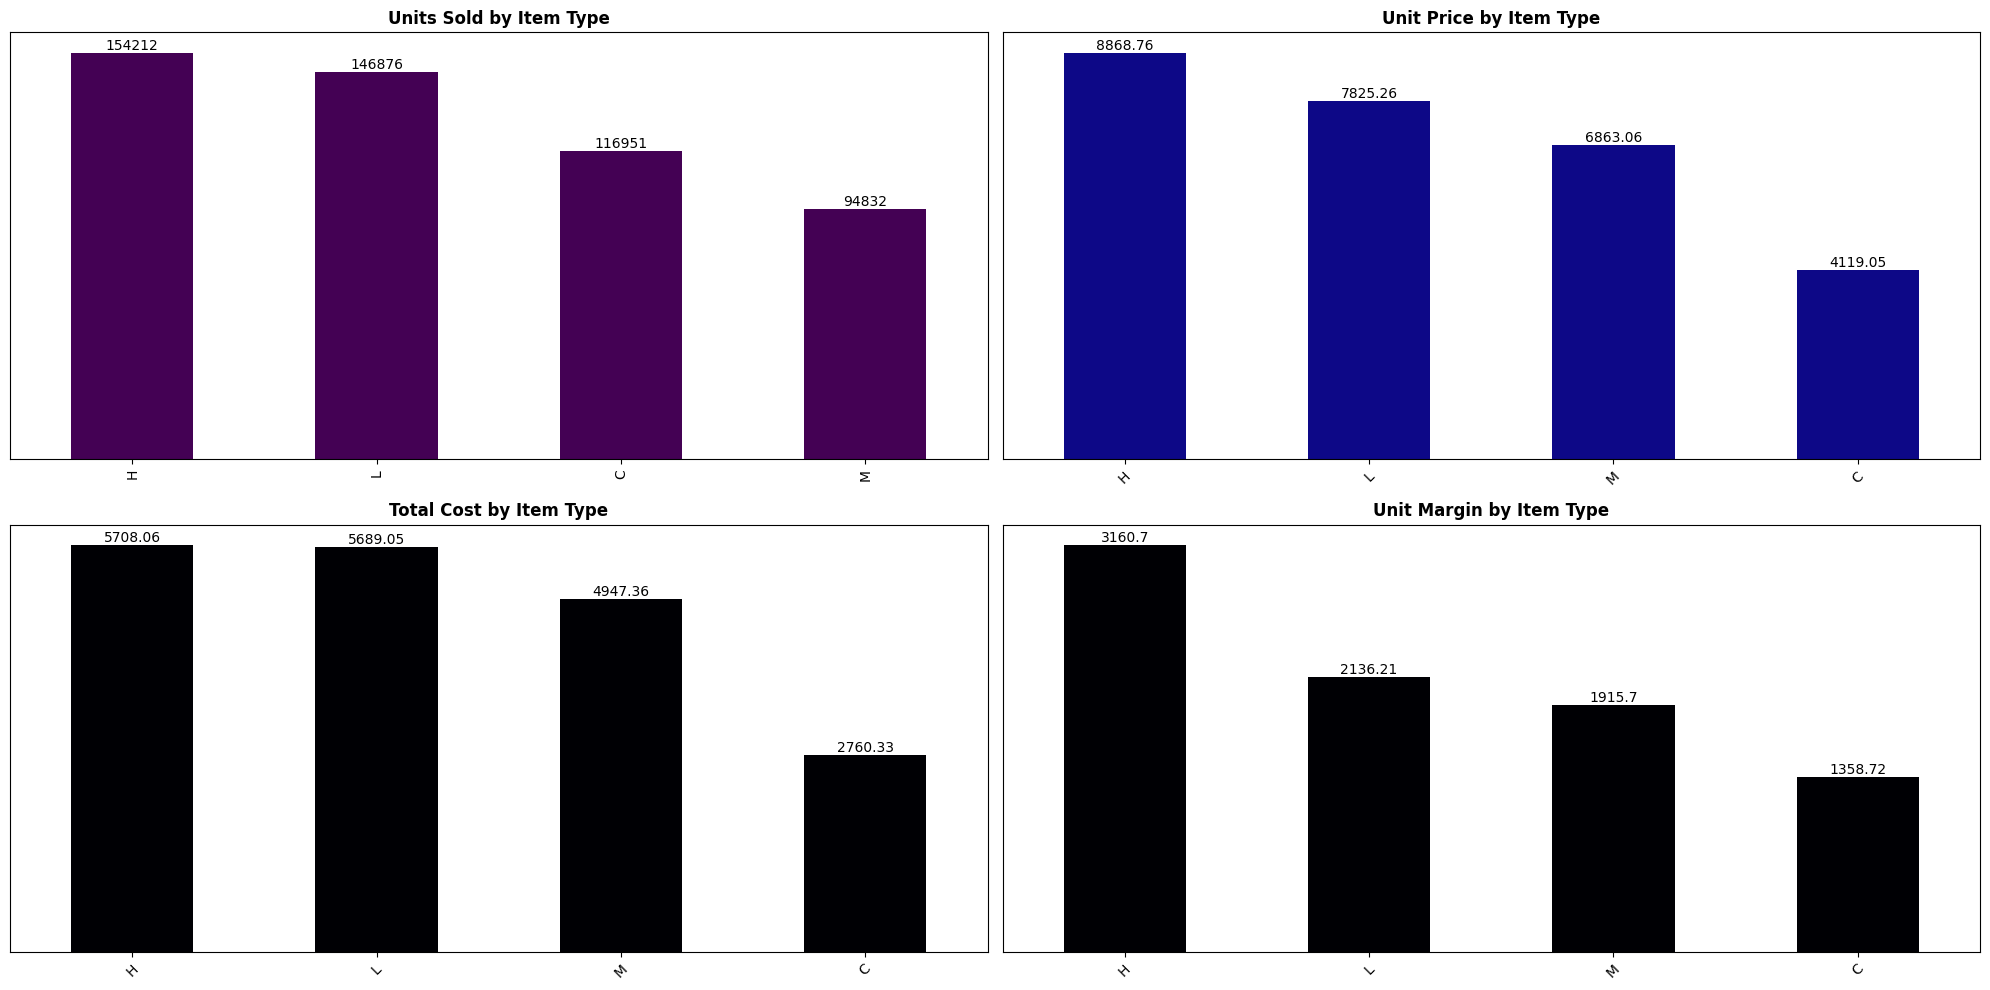

In [79]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
a = df.groupby('Order Priority')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Units Sold by Item Type', fontsize=12, fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.yticks([])
a.set(xlabel=None, ylabel=None)

plt.subplot(222)
b = df.groupby('Order Priority')['Unit Price'].sum().sort_values(ascending=False).plot(kind='bar', colormap='plasma')
plt.title('Unit Price by Item Type', fontsize=12, fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.yticks([])
b.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(223)
c = df.groupby('Order Priority')['Unit Cost'].sum().sort_values(ascending=False).plot(kind='bar', colormap='inferno')
plt.title('Total Cost by Item Type', fontsize=12, fontweight='bold')
for i in c.containers:
    c.bar_label(i)
plt.yticks([])
c.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(224)
d = df.groupby('Order Priority')['Unit Margin'].sum().sort_values(ascending=False).plot(kind='bar', colormap='magma')
plt.title('Unit Margin by Item Type', fontsize=12, fontweight='bold')
for i in d.containers:
    d.bar_label(i)
plt.yticks([])
d.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insights And Recommendations:**

1. Units Sold by Order Priority
- The first subplot displays the total units sold for each order priority level. This helps identify which order priority levels have higher sales volumes.
- H And L are the Order priority with the highest units sold.
- M order priorities with lower sales, indicating potential areas for improving sales strategies or customer service.
  
2. Unit Price by Order Priority
- The second subplot shows the total unit price for each order priority level. This reflects the revenue generated from sales at different priority levels.
- H is the order priority which generates the highest total unit price.
- C order priority with significant lower revenue contributions.

3. Total Cost by Order Priority
-  The third subplot presents the total unit cost for each order priority level. This helps in understanding the cost structure associated with different priority levels.
- H is the order priority with the highest total unit cost.

4. Unit Margin by Order Priority
- The fourth subplot shows the total unit margin for each order priority level. This reflects the profitability associated with different priority levels.
- H is the most profitable order priority based on total unit margin.

## *Analyzing the Month feature:*

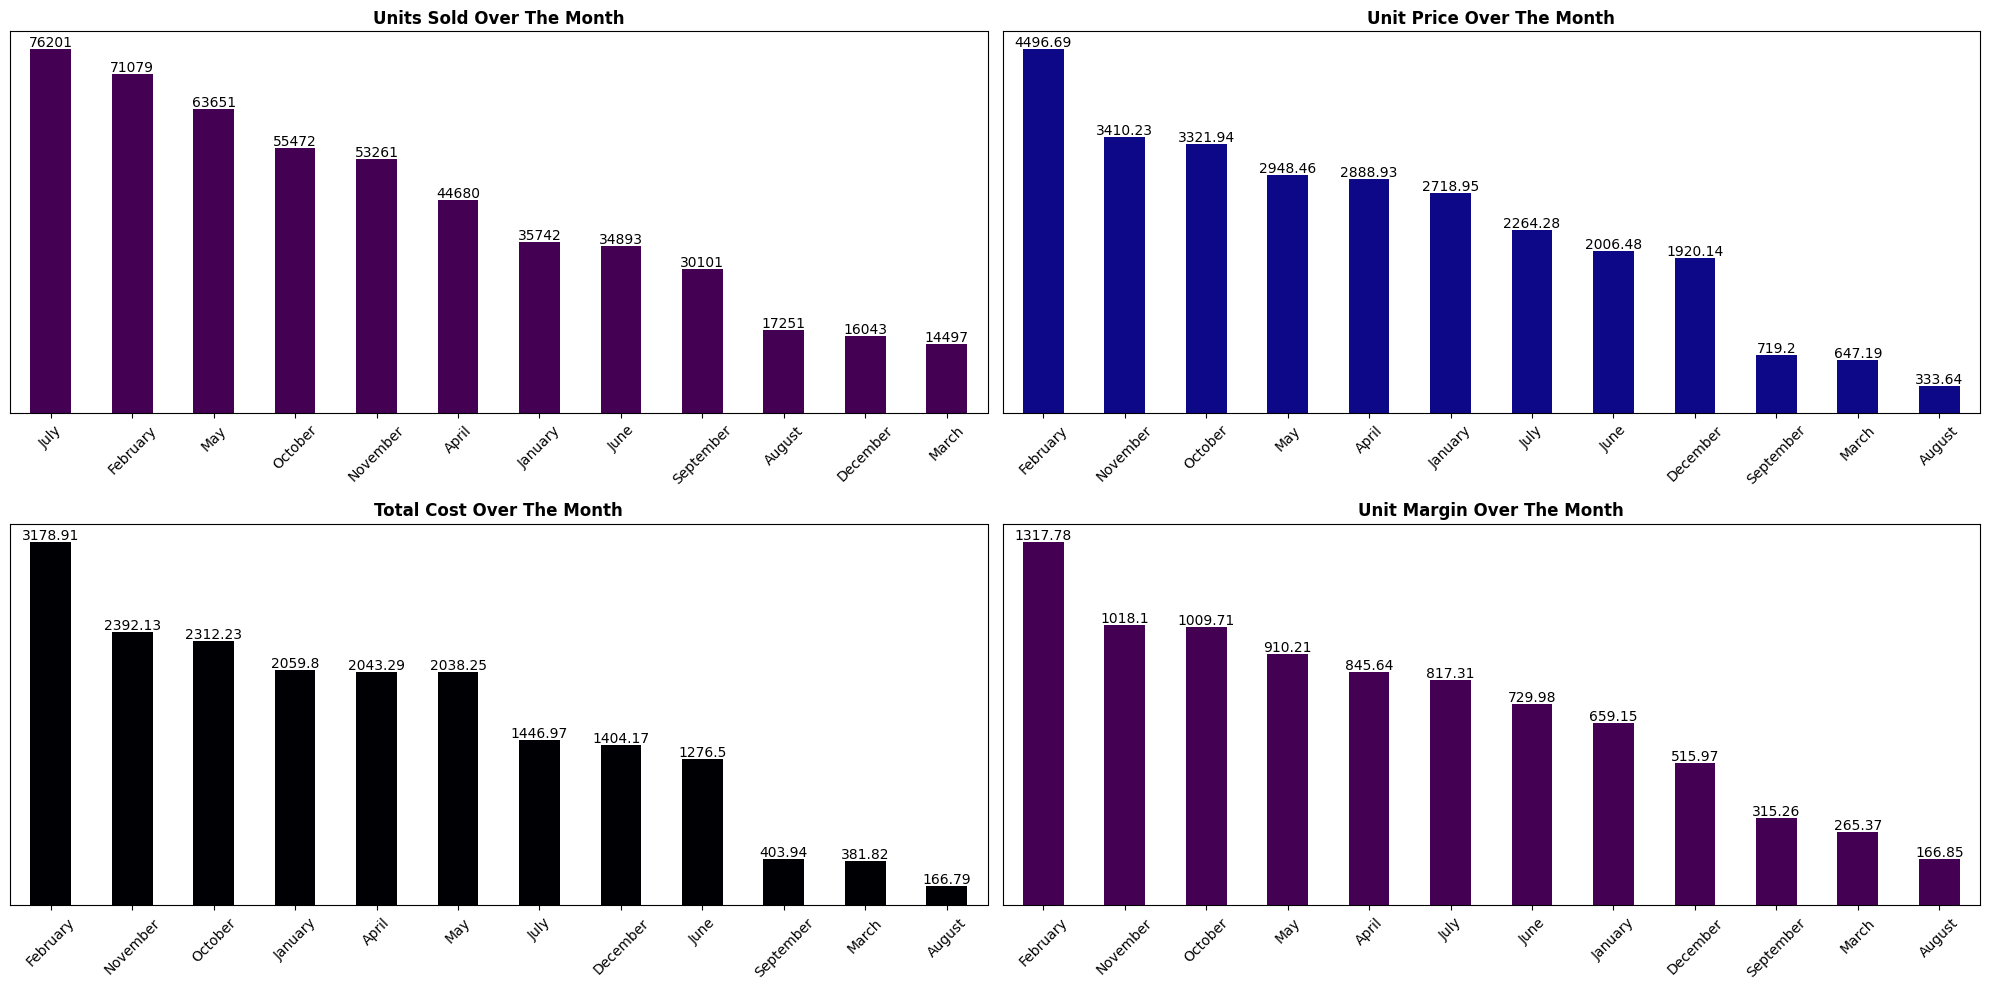

In [47]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
a = df.groupby('Month')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Units Sold Over The Month', fontsize=12, fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.yticks([])
a.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(222)
b = df.groupby('Month')['Unit Price'].sum().sort_values(ascending=False).plot(kind='bar', colormap='plasma')
plt.title('Unit Price Over The Month', fontsize=12, fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.yticks([])
b.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(223)
c = df.groupby('Month')['Unit Cost'].sum().sort_values(ascending=False).plot(kind='bar', colormap='inferno')
plt.title('Total Cost Over The Month', fontsize=12, fontweight='bold')
for i in c.containers:
    c.bar_label(i)
plt.yticks([])
c.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(224)
d = df.groupby('Month')['Unit Margin'].sum().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Unit Margin Over The Month', fontsize=12, fontweight='bold')
for i in d.containers:
    d.bar_label(i)
plt.yticks([])
d.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insights:**

- July is the month with the highest unit sold.
- February is the month with highest unit Price.
- The highest cost genereated momth is February. And least is the August month.

## *Analyzing the Year feature:*

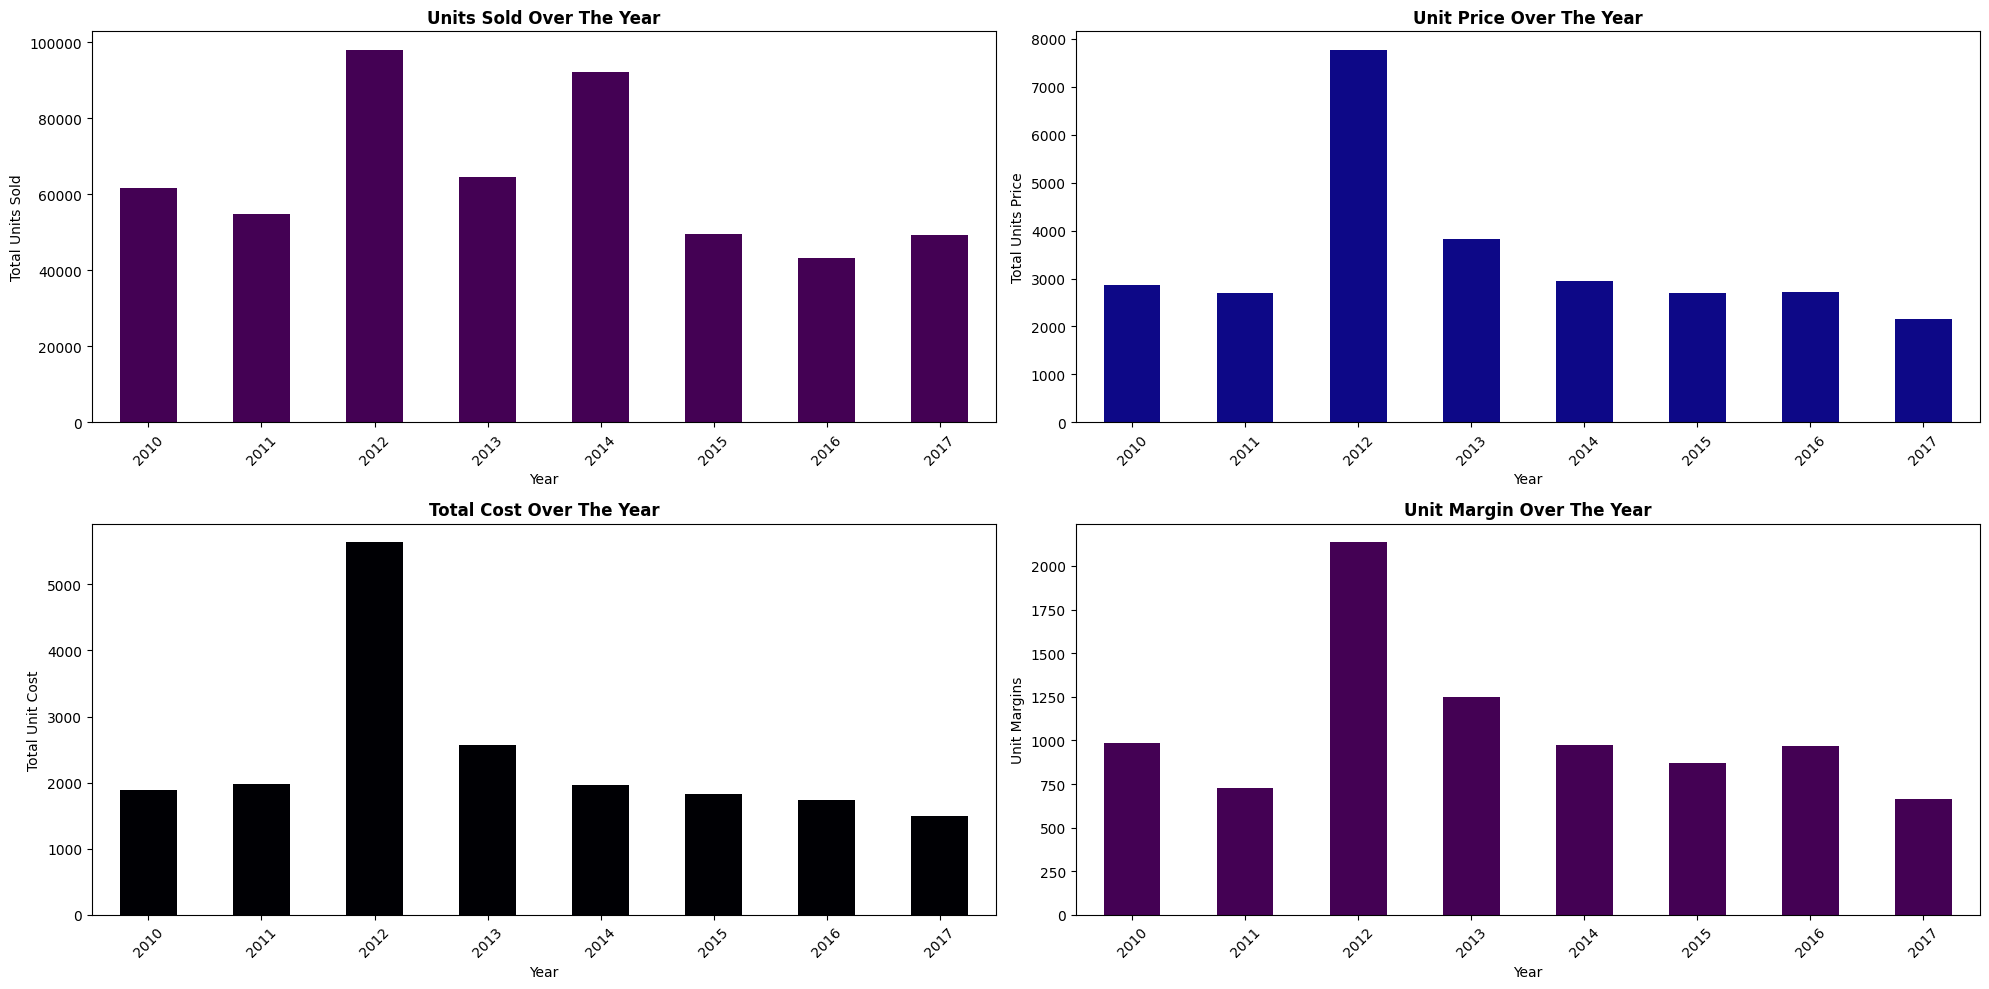

In [81]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
df.groupby('Year')['Units Sold'].sum().plot(kind='bar', colormap='viridis')
plt.title('Units Sold Over The Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(222)
df.groupby('Year')['Unit Price'].sum().plot(kind='bar', colormap='plasma')
plt.title('Unit Price Over The Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Units Price')
plt.xticks(rotation=45)

plt.subplot(223)
df.groupby('Year')['Unit Cost'].sum().plot(kind='bar', colormap='inferno')
plt.title('Total Cost Over The Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Unit Cost')
plt.xticks(rotation=45)

plt.subplot(224)
df.groupby('Year')['Unit Margin'].sum().plot(kind='bar', colormap='viridis')
plt.title('Unit Margin Over The Year', fontsize=12, fontweight='bold')
plt.ylabel('Unit Margins')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight:**

1. Units Sold Over The Year
- The first subplot displays the total units sold each year. This helps identify trends in sales volume over time.
- 2012 and 2014 are the year with the highest units sold.
- There is no as such patterns or trends, such as increasing or decreasing sales over the years.
- 2016 Year is having very less units solds value in comparison with other years.

2. Unit Price Over The Year
- The second subplot shows the total unit price each year. This reflects the annual revenue generated from unit sales.
- 2012 is the year that generated the highest Revenue genereated from the unit sales.
- 2011 is the year with the lowest revenue genreated annualy.

3. Total Cost Over The Year
- The third subplot presents the total unit cost each year. This helps in understanding the annual cost structure.
- 2012 is the year with the highest total unit cost.

4. Unit Margin Over The Year
-  The fourth subplot shows the total unit margin each year. This reflects the annual profitability.
- 2012 is the most profitable year based on total unit margin.

## *Analyzing the Region feature:*

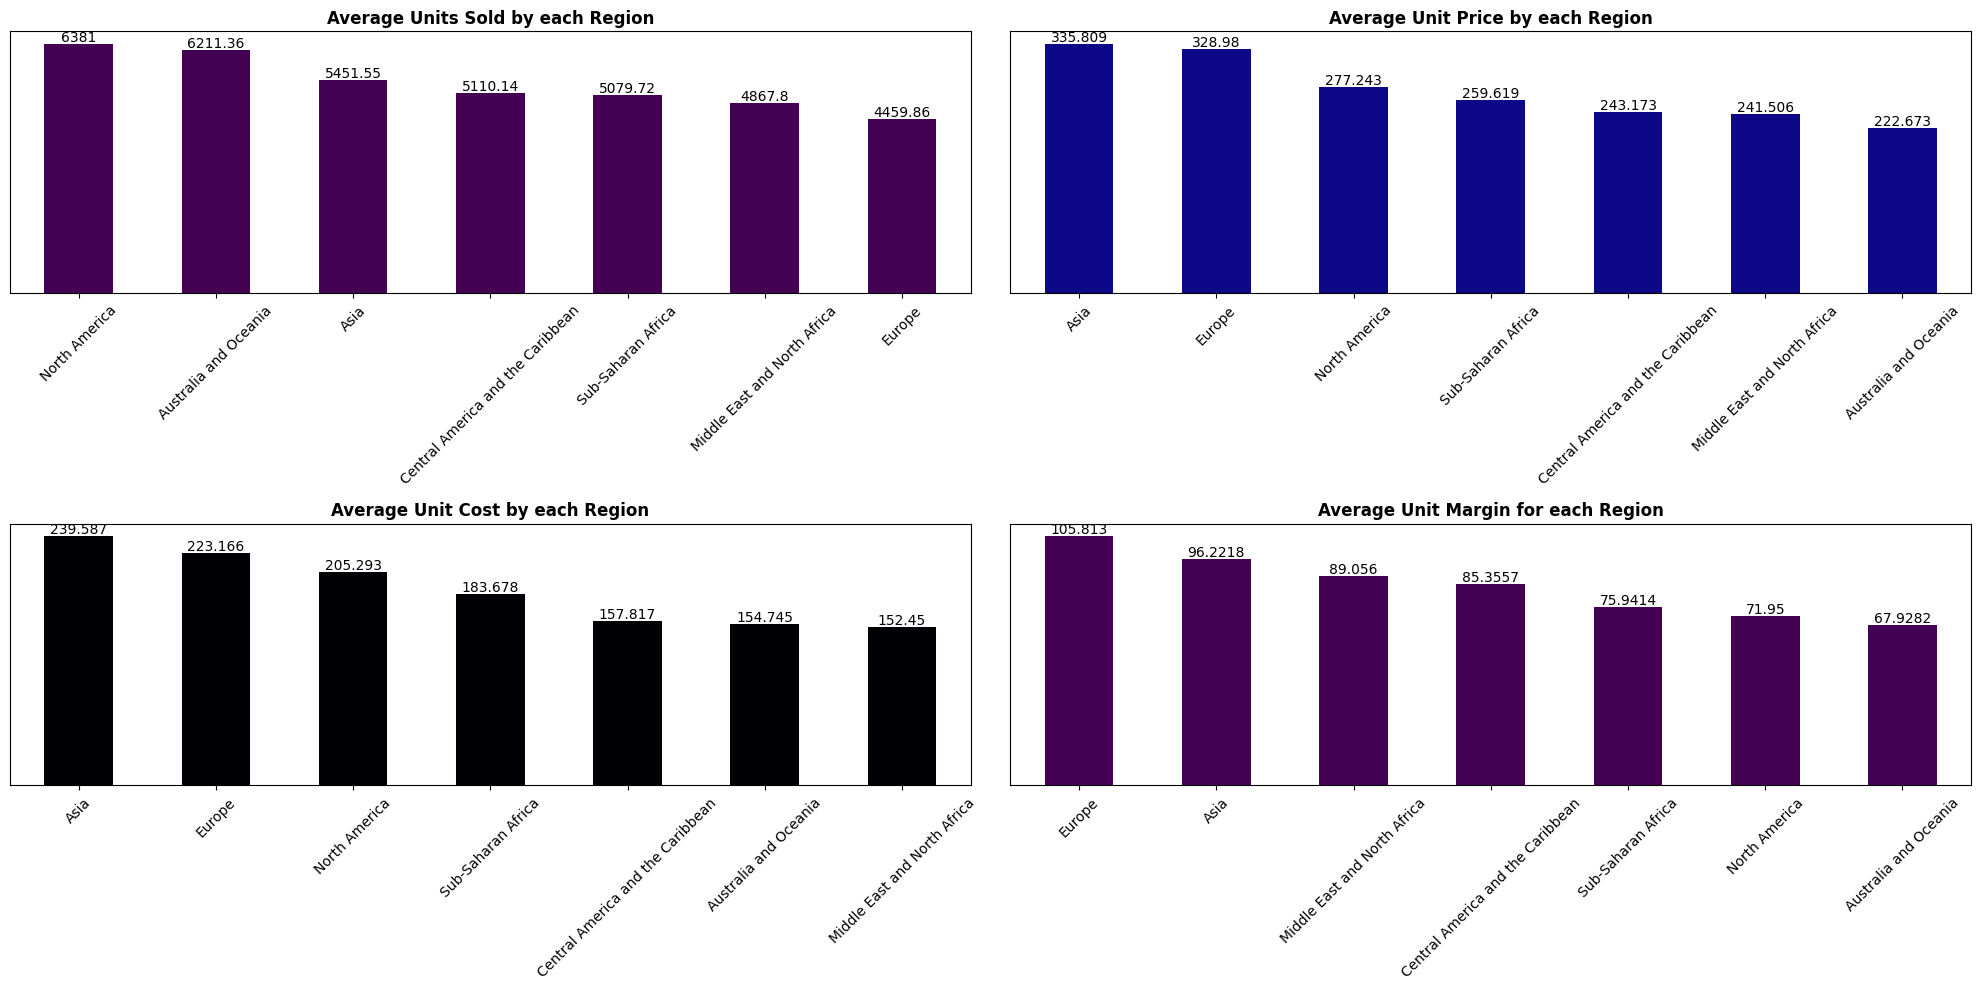

In [54]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
a = df.groupby('Region')['Units Sold'].mean().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Average Units Sold by each Region', fontsize=12, fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.yticks([])
a.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(222)
b = df.groupby('Region')['Unit Price'].mean().sort_values(ascending=False).plot(kind='bar', colormap='plasma')
plt.title('Average Unit Price by each Region', fontsize=12, fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.yticks([])
b.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(223)
c = df.groupby('Region')['Unit Cost'].mean().sort_values(ascending=False).plot(kind='bar', colormap='inferno')
plt.title('Average Unit Cost by each Region', fontsize=12, fontweight='bold')
for i in c.containers:
    c.bar_label(i)
plt.yticks([])
c.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(224)
d = df.groupby('Region')['Unit Margin'].mean().sort_values(ascending=False).plot(kind='bar', colormap='viridis')
plt.title('Average Unit Margin for each Region', fontsize=12, fontweight='bold')
for i in d.containers:
    d.bar_label(i)
plt.yticks([])
d.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight:**

1. Average Units Sold by Each Region
- The first subplot displays the average units sold in each region. This helps identify which regions have higher sales volume on average.
- North America is the region with the highest average units sold.
- Europe is the regions with lower average sales, which may need targeted marketing strategies.

2. Average Unit Price by Each Region
- The second subplot shows the average unit price by each region. This helps in understanding the pricing strategies and market positioning in different regions.
- Asia is the region which has the highest average unit price, indicating premium markets.
- Astralia and Ocenania is the regions with lower average unit prices, which may indicate competitive pricing or cost-sensitive markets.

3. Average Unit Cost by Each Region
- The third subplot presents the average unit cost by each region. This helps in understanding the cost structure and efficiency in different regions.
- Asia is the region with the highest average unit cost, indicating higher production or logistics costs.
- Middel east and North Africa are the regions with lower average unit costs, which may have better cost management or economies of scale.

4. Average Unit Margin for Each Region
- The fourth subplot shows the average unit margin by each region. This reflects the profitability of sales in different regions.
- Europe is the most profitable regions based on average unit margin.
- Australlia and Oceania is the regions with lower average unit margins, indicating potential areas for improving cost efficiency or pricing strategies

## *Analyzing the Country feature:*

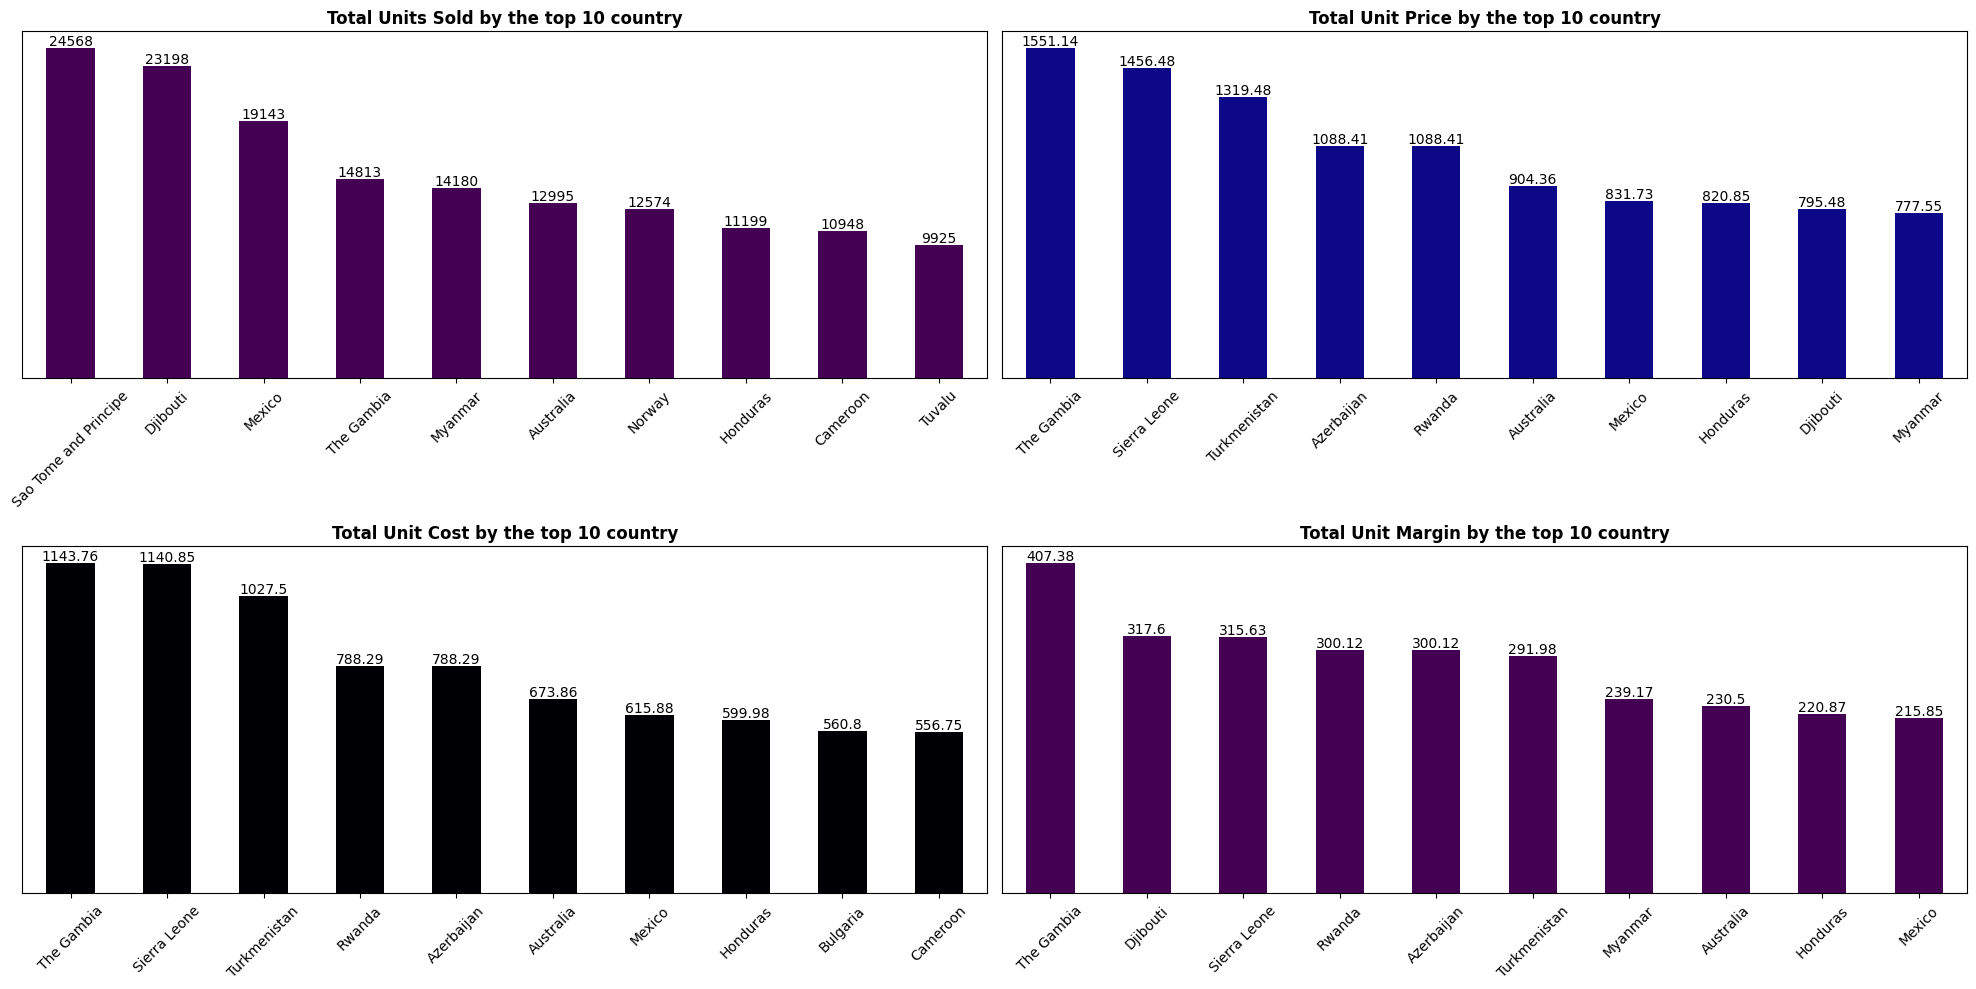

In [63]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
a = df.groupby('Country')['Units Sold'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='viridis')
plt.title('Total Units Sold by the top 10 country', fontsize=12, fontweight='bold')
for i in a.containers:
    a.bar_label(i)
plt.yticks([])
a.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(222)
b = df.groupby('Country')['Unit Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='plasma')
plt.title('Total Unit Price by the top 10 country', fontsize=12, fontweight='bold')
for i in b.containers:
    b.bar_label(i)
plt.yticks([])
b.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(223)
c = df.groupby('Country')['Unit Cost'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='inferno')
plt.title('Total Unit Cost by the top 10 country', fontsize=12, fontweight='bold')
for i in c.containers:
    c.bar_label(i)
plt.yticks([])
c.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.subplot(224)
d = df.groupby('Country')['Unit Margin'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='viridis')
plt.title('Total Unit Margin by the top 10 country', fontsize=12, fontweight='bold')
for i in d.containers:
    d.bar_label(i)
plt.yticks([])
d.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insights:**

1. Total Units Sold by the Top 10 Countries
- The first subplot displays the total units sold in the top 10 countries. This can highlight which countries have the highest sales volume.
- Sao tome and principe is the country with the highest units sold.
- and Tuvalu is country with the least units sold from the top 10 countries.

2. Total Unit Price by the Top 10 Countries
- The second subplot shows the total unit price by the top 10 countries. This can give an indication of the revenue generated from unit sales in each country.
- The Ggambia country generates the highest revenue from unit sales.
- and Mayanmar Genereates the leat revenue amongest the top 10 countries

3. Total Unit Cost by the Top 10 Countries
- The third subplot represents the total unit cost by the top 10 countries. This helps understand the cost incurred for the units sold in each country.
- The Gambia is the countries associated with the highest costs.
- Cameroon country with the least costs.
  
4. Total Unit Margin by the Top 10 Countries
- The fourth subplot shows the total unit margin by the top 10 countries. This metric reflects the profitability of sales in each country.
- The Gambia is the most profitable countries based on unit margin.
- mexico with the least profitable amoungst the top 10 countries.

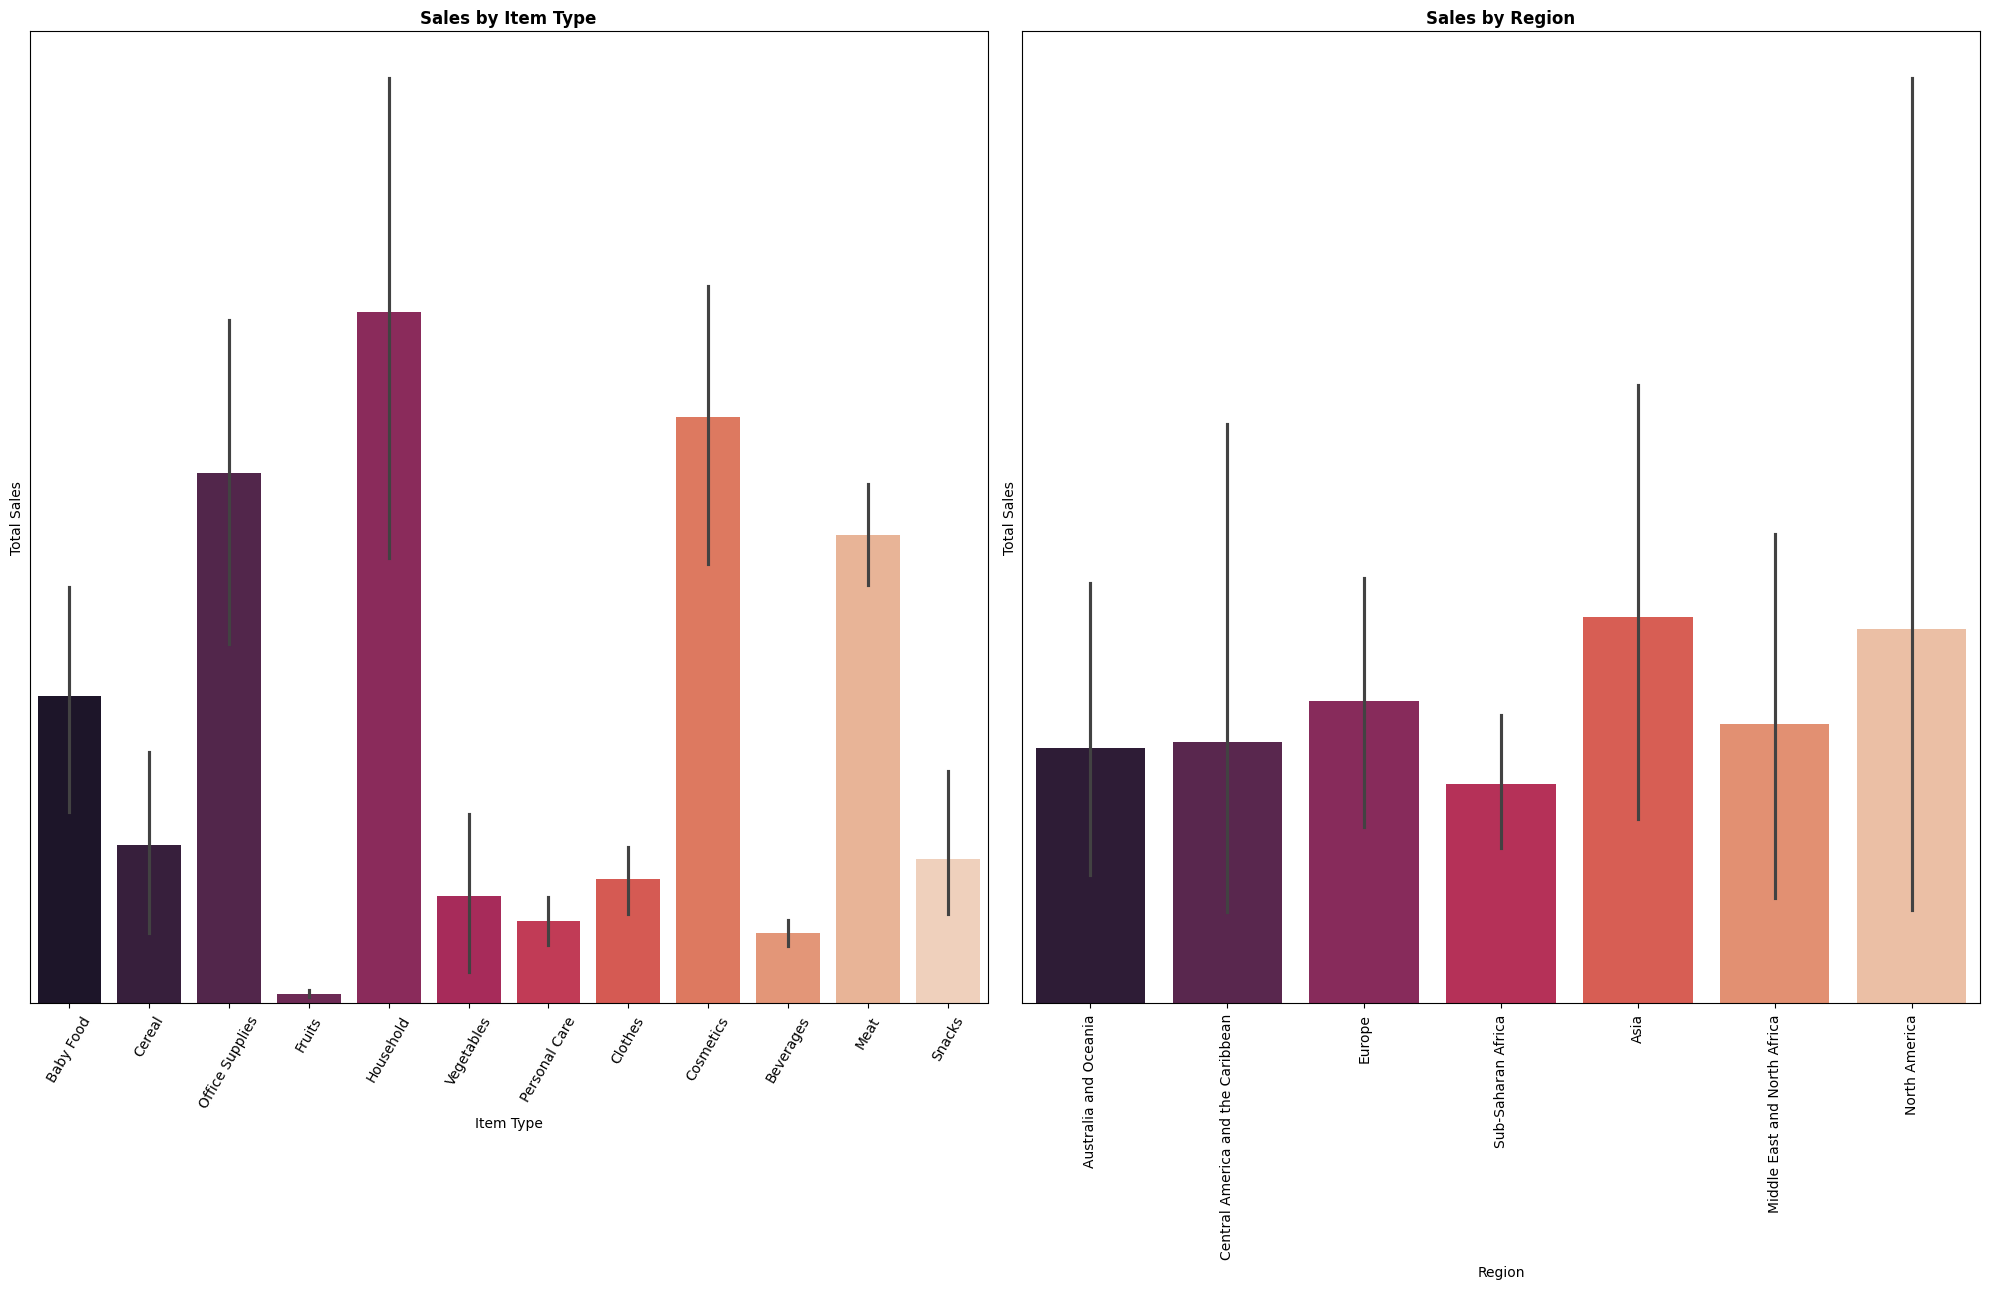

In [91]:
plt.figure(figsize=(20, 13))

plt.subplot(121)
sns.barplot(data = df, x = 'Item Type', y = 'Total Sales',palette='rocket')
plt.title('Sales by Item Type',fontsize = 12, fontweight='bold')
plt.yticks([])
a.set(xlabel=None, ylabel=None)
plt.xticks(rotation = 60)
    
plt.subplot(122)
sns.barplot(data = df, x = 'Region', y = 'Total Sales', palette='rocket')
plt.title('Sales by Region',fontsize = 12, fontweight='bold')
plt.xticks(rotation = 90)
plt.yticks([])
b.set(xlabel=None, ylabel=None)


plt.tight_layout()
plt.show()

# Key metrics and relationship:

These are the KPI,which i have calculated or found out: 

- **Total Sales:** Total revenue generated from sales is *137348768.31*

Orders count: 100
- **Average Order Value (AOV)**: Average revenue per order.
- **Order Count:** Number of orders placed is*100* 
- **Sales by Category or Item Type:** *Household* item type is falls under Highest sales product.
- **Sales by Region:** Breakdown of sales by different regions. and Asia is with the highest number.

# *Recommendations:*

- **Implement Effective Marketing Campaigns**
1. Recommendation: Develop targeted marketing campaigns to drive sales and increase brand awareness.
2. Action: Use customer segmentation to create personalized marketing messages. Leverage digital marketing channels such as social media, email marketing, and search engine optimization to reach potential customers. Measure the effectiveness of campaigns and adjust strategies based on performance metrics.


- **Adopt Sustainable Practices**
1. Recommendation: Implement sustainable practices in sales and distribution to meet consumer demand and reduce costs.
2. Action: Optimize packaging to reduce waste and shipping costs. Source products from sustainable suppliers and promote eco-friendly products. Implement energy-efficient practices in warehouses and distribution centers.

- **Enhance Sales Force Efficiency**
1. Recommendation: Improve the efficiency and effectiveness of the sales force.
2. Action: Provide regular training to the sales team on the latest sales techniques, product knowledge, and customer relationship management (CRM) tools. Implement performance tracking to identify top performers and areas needing improvement.

-  **Optimize Distribution Channels**
1. Recommendation: Streamline distribution channels to reduce costs and improve efficiency.
2. Actions: Evaluate current distribution networks and identify areas for improvement.
Consider direct-to-consumer (DTC) models, partnerships with third-party logistics providers, and regional distribution centers to enhance delivery speed and reduce shipping costs.

- **Implement Customer Relationship Management (CRM) Systems**
1. Recommendation: Use CRM systems to manage and improve customer interactions.
2. Action: Implement a robust CRM system to track customer interactions, manage leads, and improve customer service. Use CRM data to personalize marketing efforts and enhance customer loyalty.

- **Develop Multi-Channel Sales Strategies**
1. Recommendation: Diversify sales channels to reach a broader audiences.
2. Action: Expand sales through online marketplaces, social media platforms, and physical retail locations.

- **Focus on High-Margin Products**
1. Recommendation: Prioritize the promotion and sales of high-margin products.
2. Action: For Example Cosmetics in our case, Identify products with the highest profit margins and allocate more resources to their marketing and sales efforts. 

- **Improve Inventory Management**
1. Recommendation: Optimize inventory levels to balance demand and reduce carrying costs.

- **Enhance Customer Experience**
1. Recommendation: Focus on delivering exceptional customer service to build loyalty and repeat business.
2. Action: Train staff to provide high-quality customer service. Open to feeedback to gather customer insights and address issues promptly. 

- **Invest in Technology and Automation**
1. Recommendation: Use technology to automate and improve sales and distribution processes.
2. Action: Invest in sales automation tools to streamline tasks such as lead management, order processing, and customer follow-ups. Use warehouse management systems (WMS) and automated fulfillment solutions to increase efficiency and reduce errors.

- **Monitor Competitor Strategies**
1. Recommendation: Keep a close watch on competitor activities and market trends.
